<h1><center>Stats and Public Health Deliverable 1</center></h1>
<h4><center>Rafael Almazan | BrainStation</center></h4>

In [1]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# read the mosquito data into pandas
mosquito = pd.read_csv('mosquito_data.csv')

## Part 1 - Basic Data Wrangling

To start, we will take a peak at the Dataframe and get some quick information on the number of columns, and look for null values. We can also take a look at a quick summary of basic statistics for the numberical columns with .describe().



In [3]:
display(mosquito.head())

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [4]:
mosquito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


In [5]:
# check percentage of null values

mosquito.isna().sum()/mosquito.shape[0]*100

Year                0.000000
Week                0.000000
Address Block       0.000000
Block               0.000000
Trap                0.000000
Trap type           0.000000
Date                0.000000
Mosquito number     0.000000
Mosquito ID         0.000000
WNV Present         0.000000
Species             0.000000
Lat                15.809678
Lon                15.809678
dtype: float64

In [6]:
# get an overview of the mosquito numerical data
mosquito.describe()

,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


We see that we have about 18495 rows and 13 columns in this dataframe. The dataframe contains rows of West Nile Virus (WNV) tests and information surrounding the date, location, mosquito species, and outcome of these tests

In [7]:
# view how many rows and columns are in the dataframe
mosquito.shape

(18495, 13)

This mosquito dataframe has the shape (18495, 13) which means that there are 18495 rows of data (WNV tests) and 13 different columns

In [8]:
# checking what type each value in the Date column is
type(mosquito['Date'][0])

str

In [9]:
# convert the Date column into a datetime64 type
mosquito['Date'] = pd.to_datetime(mosquito['Date'])

In [10]:
mosquito['Date'] # making sure the type is datetime

0       2019-09-26 00:09:00
1       2019-09-26 00:09:00
2       2019-09-26 00:09:00
3       2019-09-26 00:09:00
4       2019-09-26 00:09:00
                ...        
18490   2016-09-09 00:09:00
18491   2007-08-24 00:08:00
18492   2016-07-27 00:07:00
18493   2017-08-17 00:08:00
18494   2015-08-20 00:08:00
Name: Date, Length: 18495, dtype: datetime64[ns]

In [11]:
mosquito.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


Now we are going to check the distributions for some of the columns

<Figure size 640x480 with 0 Axes>

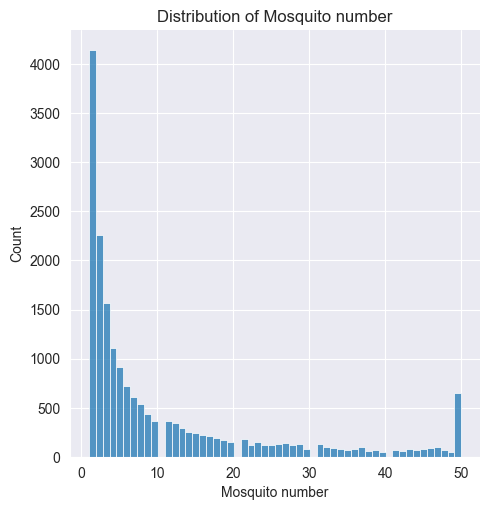

In [12]:
# plotting a histogram of mosquito numbers
plt.figure()
sns.displot(mosquito['Mosquito number'])
plt.title("Distribution of Mosquito number")
plt.show()

<Figure size 640x480 with 0 Axes>

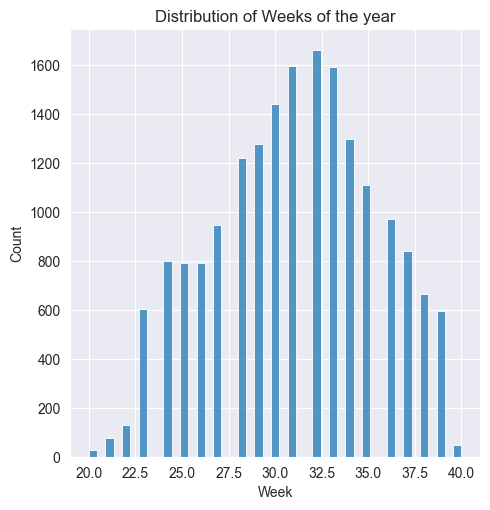

In [13]:
# plotting a histogram for distribution of the weeks in the year
plt.figure()
sns.displot(mosquito['Week'])
plt.title('Distribution of Weeks of the year')
plt.show()

<Figure size 640x480 with 0 Axes>

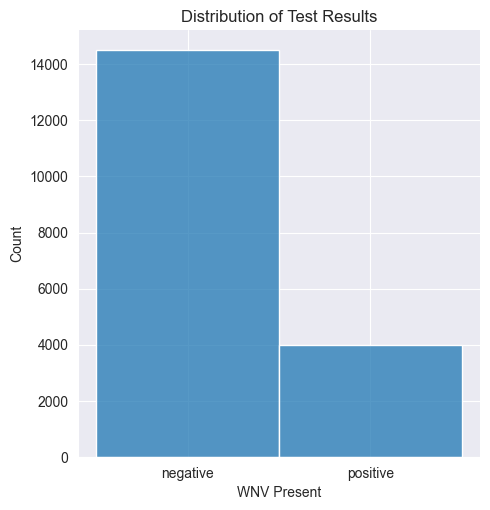

In [14]:
# plotting a bar plot of the distribution of positive and negative test results
plt.figure()
sns.displot(mosquito['WNV Present'])
plt.title('Distribution of Test Results')
plt.show()

<Figure size 640x480 with 0 Axes>

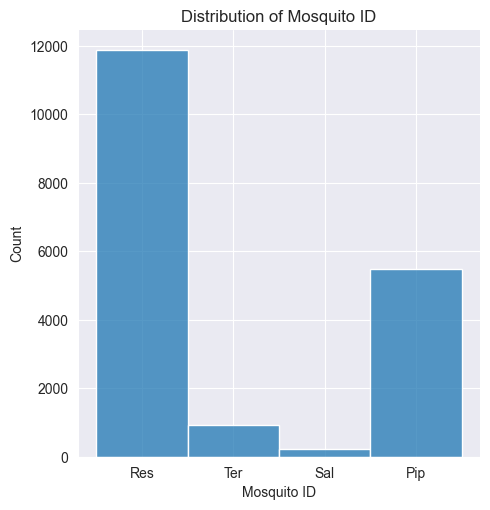

In [15]:
# plotting a bar plot of the distribution of different species of mosquito
plt.figure()
sns.displot(mosquito['Mosquito ID'])
plt.title('Distribution of Mosquito ID')
plt.show()

### 1.3: Description of two numeric and two categorical columns

**Mosquito number:** 
This numerical column stores the number of mosquitos that were caught in the specific trap. This column is exponentially distributed (see distribution graph above). There is a slight increase at a mosquito number of 50. This could be due to the limitation that the mosquito number caps at 50 and splits to another row if it is above 50.

**Week:**
This numerical column stores the week of the year that the West Nile Virus test was performed. This column has a normal distribution with the peak being about 32 weeks into the year.

**WNV Present:**
This categorical column stores whether the West Nile Virus was present in the trapped mosquitos. This is a Bernoulli distribution since there are only two choices, positive or negative.

**Mosquito ID:**
This categorical column shows the abbreviated species names and follows a categorical distribution. This is not a uniform distribution because the species are not all caught at the same rate.

In [16]:
# making sure that Species and Mosquito ID Match
display(mosquito['Species'].unique())
display(mosquito['Mosquito ID'].unique())

array(['CULEX RESTUANS', 'CULEX TERRITANS', 'CULEX SALINARIUS',
       'CULEX PIPIENS'], dtype=object)

array(['Res', 'Ter', 'Sal', 'Pip'], dtype=object)

In [17]:
# testing if you can take the year and week from a datetime data type
mosquito['Date'].dt.isocalendar().year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
18490    2016
18491    2007
18492    2016
18493    2017
18494    2015
Name: year, Length: 18495, dtype: UInt32

### 1.4: Redundant columns 

There are multiple columns that tell us the same information. We will now remove these redundant columns. 

The Week and Year column is redundant since we already have the Date column which includes the Date and Time. We are able to extract both the week and the year from this datetime data type.

The Species column is also redundant. We already have the species ID for each mosquito. These IDs match the mosquito species by taking the first three characters of each species. Since the genus is the same for all four species, we do not need the genus information.

We will also be removing the Block column since the block is already included in Address Block.

In [18]:
# saving a checkpoint of mosquito dataset with the Week, Year, and Species
mosquito1 = mosquito

# dropping the Week, Year, and Species columns from the mosquito dataset
mosquito = mosquito.drop(['Week', 'Year', 'Species', 'Block'], axis=1)


The Mosquito ID of each Genus and Species

1. *Culex Pipiens* - pip
2. *Culex Restuans* - res
3. *Culex Salinarius* - sal
4. *Culex Territans* - ter

In [19]:
# taking a look at the dataframe to make sure columns have been dropped
mosquito.head()


,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Lat,Lon
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,NaN,NaN
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,41.798211,-87.736925
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,41.987245,-87.689417
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,41.953664,-87.724987
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,41.657069,-87.546049


While we filtered out for redundant columns, we are not filtering out for all duplicate rows since the tests are organized in a way that when the number of mosquitos exceed 50, they split it into another row. These may account for duplicates if the number of mosquitos in a test reaches above 100. We will only drop a row if a row is duplicated and does not have a mosquito number of 50. 

Even among the duplicated rows, there are NULL Latitude and Longitude Values and so we are not confident that these are from the same trap. Therefore we are only removing the duplicates with a valid Lat and Lon value.

We will keep these rows that have a Mosquito number of 50 in our dataframe. We are unable to add these together since many of them have NULL Latitude and Longitude values so we do not have 100% confidence that they are from the same trap.


In [20]:
# making a checkpoint for our dataframe

mosquito2 = mosquito
mosquito2.duplicated().sum() # mosquito data with duplicates

662

In [21]:
# dataframe of duplicate rows that do not have a mosquito number of 50

mosquito[(mosquito.duplicated()) & ~(mosquito['Mosquito number'] == 50) & ~(mosquito['Lat'].isna())]

# only end up removing 2 rows

,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Lat,Lon
2832,58XX N RIDGE AVE,T231,GRAVID,2017-07-14 00:07:00,2,Res,negative,41.987881,-87.666785
2856,20XX N DOMINICK ST,T240,GRAVID,2017-07-14 00:07:00,1,Res,negative,41.918676,-87.664374


In [22]:
# droping all duplicates that do not have a mosquito number of 50
mosquito = mosquito.drop(mosquito[(mosquito.duplicated()) & ~(mosquito['Mosquito number'] == 50) & ~(mosquito['Lat'].isna())].index)

In [23]:
# checking to see if there are still any duplicates without a mosquito number of 50
mosquito[(mosquito.duplicated()) & ~(mosquito['Mosquito number'] == 50) & ~(mosquito['Lat'].isna())]

,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Lat,Lon


In [24]:
# making sure all duplicated has Lat == NULL
mosquito[mosquito.duplicated()]['Lat'].unique()

array([nan])

### 1.5: Dealing with NULL values

Both the Latitude and Longitude columns contain NULL values. These NULL values account for about 16% of the total Latitude and Longitude numbers.

Since the Latitude and Longitude are not important for the purposes of our specific study. We are going to drop the Latitude and Longitude columns. This will also rid our data of unnecessary columns

It would not make sense to imputate mean or median values for the Lat and Lon columns since they are coordinates. Taking the mean or median will not do us any good. We are also not going to take away rows with null Lat and Lon values since they would take away from our sample. We are much more concerned with the WNV test outcomes and the mosquito numbers than Lat and Lon values. Therefore, it is more justifiable to retain those rows and remove the Lat and Lon columns entirely.

In [25]:
# check the proportions of null values
mosquito.isna().sum()/mosquito.shape[0]*100

Address Block       0.000000
Trap                0.000000
Trap type           0.000000
Date                0.000000
Mosquito number     0.000000
Mosquito ID         0.000000
WNV Present         0.000000
Lat                15.811388
Lon                15.811388
dtype: float64

In [26]:
# saving a checkpoint
mosquito3 = mosquito


In [27]:
# dropping the Latitude and Longitude columns
mosquito = mosquito.drop(['Lat', 'Lon'], axis=1)
mosquito.head()

,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative


## Part 2 - Basic EDA

To look at the relationship between mosquito number and date, we will create a line plot. This will show how the mosquito number changes over time.

C:\Users\ralmz\AppData\Local\Temp\ipykernel_27756\3311679310.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mosquito_monthly = mosquito.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()


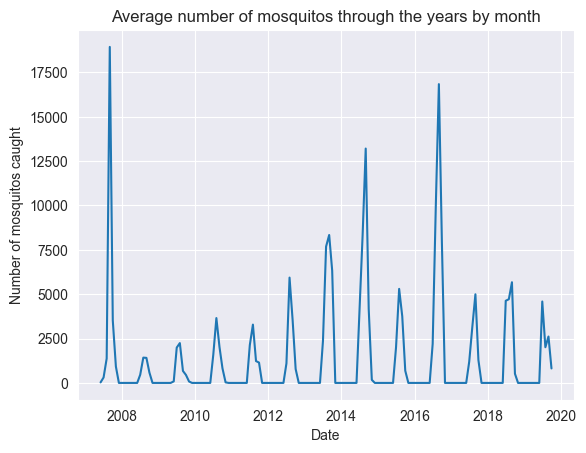

In [28]:
# separating the mosquito data into the sum of mosquitos captured every month
mosquito_monthly = mosquito.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()

# plotting the relationship of mosquito number and date through the years by month
sns.lineplot(x='Date', y='Mosquito number', data=mosquito_monthly)
plt.ylabel('Number of mosquitos caught')
plt.xlabel('Date')
plt.title('Average number of mosquitos through the years by month')
plt.show()


Although messy, the line plot above shows spikes within the years. This means that there is seasonality to the mosquito numbers. The mosquito number seems to go though a cycle of a sudden burst followed by constant activity.

To look into this seasonality aspect further, we will zoom into the year and see how the mosquito changes month by month as the year goes by.

In [29]:
# extract the month from the Date column and group by month, combining the same month for all years.
mosquito['Month'] = mosquito['Date'].dt.month

monthly_data = mosquito.groupby('Month')['Mosquito number'].sum().reset_index()
monthly_data

,Month,Mosquito number
0,5,116
1,6,28607
2,7,59004
3,8,83229
4,9,29055
5,10,1210


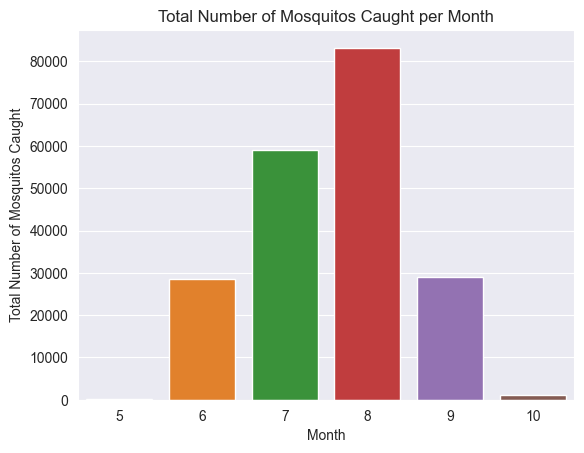

In [30]:
# plotting the monthly data across all the years

plt.figure()
sns.barplot(x='Month',y='Mosquito number',data=monthly_data, estimator='sum')
plt.title("Total Number of Mosquitos Caught per Month")
plt.ylabel('Total Number of Mosquitos Caught')
plt.show()

The bar graph above shows that there is seasonality with our mosquito numbers. During the hotter months of July and August, there seems to be much more mosquitos being captured. 

Mosquitos are very well adapted to warm, humid environments so this data is consistent with what we would expect. July and August are typically the hottest months of the year in Chicago, therefore, mosquitos will tend to be more active and reproduce much faster during these months.

## Part 3 - Advanced EDA

### 3.1 - Exploring the relationship between mosquito species and WNV prevalence

To look at this relationship, we will plot the percentages of positve tests seen for each mosquito species and compare them with a bar plot.

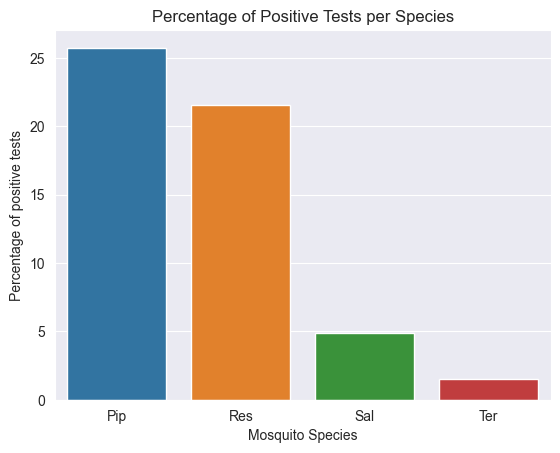

In [31]:
# grouping by the mosquito id and virus presence
counts = mosquito.groupby(['Mosquito ID', 'WNV Present']).size().unstack()
counts['Positive Percentage'] = (counts['positive']/(counts['positive'] + counts['negative']))*100

# create a bar graph showing the percentage of positve tests for every mosquito species
plt.figure()
sns.barplot(x=counts.index, y='Positive Percentage', data=counts)
plt.xlabel('Mosquito Species')
plt.ylabel('Percentage of positive tests')
plt.title('Percentage of Positive Tests per Species')
plt.show()

In [32]:
# displaying the number of positive and negative tests, as well as the percentage of positive tests
display(counts)

WNV Present,negative,positive,Positive Percentage
Mosquito ID,,,
Pip,4074,1412,25.738243
Res,9307,2557,21.552596
Sal,215,11,4.867257
Ter,903,14,1.526718


Looking at the above bar chart, we are able to see the proportions of positive tests seen for each species of Mosquito. It looks like there is a relationship between mosquito species and the proportion of positive tests

The ranking based on highest WNV prevalence to lowest would be as follows:
1. *Culex Pipiens* - 23.5%
2. *Culex Restuans* - 18.7%
3. *Culex Salinarius* - 3.2%
4. *Culex Territans* - 1.5%

As we could see, *Culex Pipiens* and *Culex Restuans* saw a much much higher WNV prevalence than the other two species. There could be a number of factors that are responsible for this such as immunity, behaviour, genetic, and environmental factors that need further research and experimentation to confirm. For now, it is sufficent to say that the WNV is more prevalent in *Culex Pipiens* and *Culex Restuans* species.

## 3.2 - Exploring the relationship between the number of mosquitos caught and trap type

To investigate this relationship, we will use a boxplot to show the median and range of the amount of mosquitos caught with each trap, to gain a better understanding of their relationship

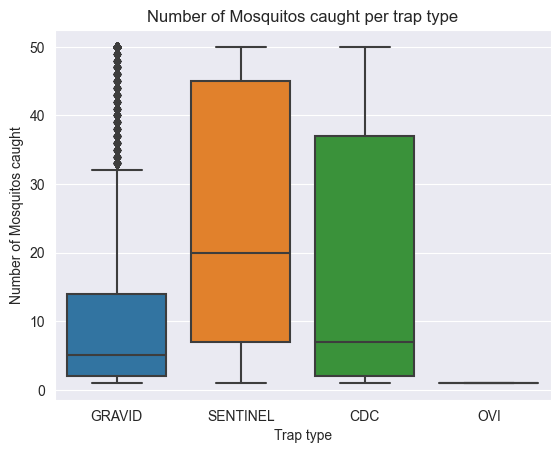

In [33]:
# Using a box plot to represent relationship between number of mosquitos and type of trap
plt.figure()
sns.boxplot(x='Trap type', y='Mosquito number', data=mosquito)
plt.title('Number of Mosquitos caught per trap type')
plt.ylabel('Number of Mosquitos caught')
plt.xlabel('Trap type')
plt.show()

In [34]:
# taking a look at all the rows with a trap type of OVI
display(mosquito[mosquito['Trap type'] == 'OVI'])

,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Month
15392,5XX S CENTRAL AVE,T167,OVI,2007-06-29 11:06:17,1,Pip,negative,6


Shown above, the OVI trap type has only been used once and caught one mosquito. This does not show us what it is capable of. This trap type has likely been taken away from circulation for reasons that are unknown. It was last used in 2007, 13 years before the latest data point.

As we could see with the box and whiskers plot above, the SENTINEL trap type was ultimately the most successful at capturing the most mosquitos per test, followed by the CDC trap. This means that the SENTINEL and CDC traps are able to take in more mosquitos in one time, compared to the others. This box plot also tells us that the GRAVID traps are the most consistent. With a much denser middle 50%, we see that it will consistently capture about 3-13 mosquitos, 50% of the time, while the SENTINEL and CDC have a much broader range of capture, giving them the potential to capture upwards of 40 mosquitos at a time. These trap types are likely also responsible for maxing out the Mosquito number column and adding rows by splitting their captures to another row.

## 3.3 - Exploring the relationship of Trap type and Mosquito Species, based on Positive WNV tests

We will investigate this relationship through the use of a heatmap. This will allow us to see patterns or relationships between the trap type and mosquito species. for this, we will drop the OVI trap type since there was only one capture using this trap.

To start, we will group together the mosquitos by species and trap type to have a look at the total Mosquito numbers between the groups. This is to get a general overview of which traps work best, and on which species of mosquito.

In [35]:
# looking into the dataframe
mosquito.head()

,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Month
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,9
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,9
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,9
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,9
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,9


Trap type,CDC,GRAVID,OVI,SENTINEL
Mosquito ID,,,,
Pip,8988.0,52120.0,1.0,255.0
Res,829.0,131926.0,NaN,4828.0
Sal,41.0,375.0,NaN,48.0
Ter,25.0,1782.0,NaN,3.0


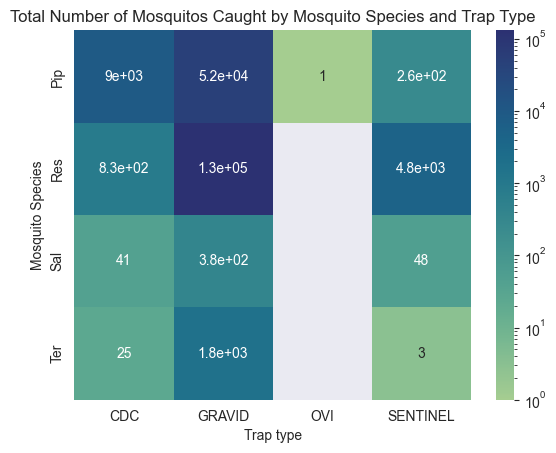

In [36]:
# Create pivot table with mosquito species as rows, trap type as columns, and sum of mosquito number as the value
number_sum_pivot = mosquito.pivot_table(index='Mosquito ID', columns='Trap type', values='Mosquito number', aggfunc='sum')
display(number_sum_pivot)

# create heatmap showing pivot table
plt.figure()
sns.heatmap(number_sum_pivot, annot=True, cmap='crest', norm=LogNorm())
plt.title('Total Number of Mosquitos Caught by Mosquito Species and Trap Type')
plt.ylabel('Mosquito Species')
plt.show()

Trap type,CDC,GRAVID,OVI,SENTINEL
Mosquito ID,,,,
Pip,23.164948,10.261863,1.0,14.166667
Res,6.685484,11.419198,NaN,25.818182
Sal,2.050000,1.829268,NaN,48.000000
Ter,2.083333,1.975610,NaN,1.000000


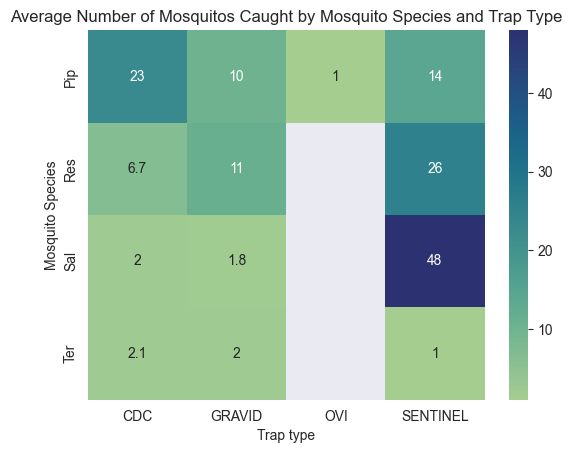

In [37]:
# Create pivot table with mosquito species as rows, trap type as columns, and avg of mosquitos captured as the value
number_mean_pivot = mosquito.pivot_table(index='Mosquito ID', columns='Trap type', values='Mosquito number', aggfunc='mean')
display(number_mean_pivot)

# create heatmap showing pivot table
plt.figure()
sns.heatmap(number_mean_pivot, annot=True, cmap='crest')
plt.title('Average Number of Mosquitos Caught by Mosquito Species and Trap Type')
plt.ylabel('Mosquito Species')
plt.show()

As we can see above, the OVI trap type only captured one mosquito. This is good reason to remove it from the analysis. Additionally, the CDC and SENTINEL trap types seemed to be the most successful as we've seen above, capturing the majority of mosquitos through all the species. 

According to the heatmap looking at the mean Mosquito numbers:
- The CDC trap is best at capturing *Culex Pipiens*
- The GRAVID trap is best at capturing *Culex Restuans*
- The SENTINEL trap is best at capturing *Culex Salinarius*

However, we cannot conclude that this is true since the CDC and SENTINEL still more frequently capture *Culex Pipiens* and *Culex Restuans*. This is possibly due to the higher nature of their population in the wild. Nevertheless, we are unable to conclude that SENTINEL traps would ultimately be the best form of trap to capture *Culex Salinarius*

We must also remember what is said above. The CDC and SENTINEL trap types may have captured more than 50 mosquitos at a time, which is recorded since the the mosquito number is capped at 50 for each row during data collection.

Next, we will be looking at the proportion of positive tests for each group of test results.

Trap type,CDC,GRAVID,OVI,SENTINEL
Mosquito ID,,,,
Pip,0.311856,0.253790,0.0,0.111111
Res,0.000000,0.214317,NaN,0.433155
Sal,0.000000,0.053659,NaN,0.000000
Ter,0.000000,0.015521,NaN,0.000000


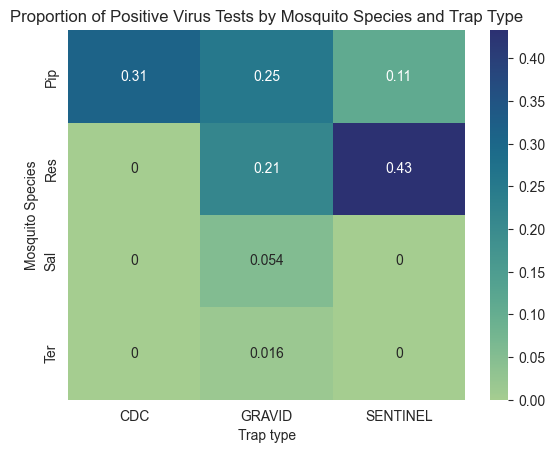

In [38]:
# Create pivot table with mosquito species as rows, trap type as columns, and proportion of positive virus tests as the value
virus_pivot = mosquito.pivot_table(index='Mosquito ID', columns='Trap type', values='WNV Present', aggfunc= lambda x: sum(x=='positive')/len(x))
display(virus_pivot)

# create heatmap showing pivot table
plt.figure()
sns.heatmap(virus_pivot.drop('OVI', axis=1), annot=True, cmap='crest')
plt.title('Proportion of Positive Virus Tests by Mosquito Species and Trap Type')
plt.ylabel('Mosquito Species')
plt.show()

The heatmap above shows that the SENTINEL trap capturing the *Culex Restuans* species shows the highest proportion of positive tests. The CDC seems to be unable to detect positive tests from any species other than the *Culex Pipiens*. We can trust the data dealing with both these species (*Culex Restuans* and *Culex Pipiens*) since we have a high enough sample size for each of these species and its designated traps. We cannot conclude if we can render positive results from CDC and SENTINEL traps when dealing with the other two species. We see evidence of positive results on these *Culex Salinarius* and *Culex Territans* species through the GRAVID traps but not alot. These also have a posibility of being false positives since they have about a 1-3% positive test rate.

## Limitations:

The biggest limitation is the method of data collection. Since no more than 50 mosquitos can be recorded at one time, we are unable to see the true range of mosquito numbers for each trap type. This does not let us see what each trap is truly capable of and we must take this into account when analyzing our data. This analysis should be redone with the whole mosquito number for each capture. It is difficult to sum these up on our own since we may also be summing up other duplicates that are not separate rows.

Having NULL Latitude and Longitude values are also a problem since we were not able to say with certainty that some rows were duplicated. This did not let us drop all the rows seen as 'duplicated'. This was even more problematic for summing together the Mosquito number for rows that were capped at 50. We were unable to say with full confidence that these were from the same trap since they all lacked LAT and LON values. 

This capping at 50 is a bug in the traps that must be fixed.


## Conclusion:

Tracking and understanding the West Nile Virus is important for limiting the transmission of the disease. As this is carried by mosquitos, understanding mosquitos and their activity throughout the year is very important. We see that mosquito numbers have a seasonality to them. In the summer months of July and August, they significantly increase in abundance and can be seen to thrive in the summer. The data also shows that the *Culex Pipiens* species saw the highest percentage of positive tests for the WNV. This could mean that they spread the virus more than other species. The GRAVID trap type seemed to be used the most. However, the CDC and SENTINEL trap types are able to catch the highest range of mosquito numbers, while the GRAVID catches a lower number of mosquitos. Lastly, we see that The SENTINEL is great at catching *Culex Restuans* with positive results while the CDC is great at catching *Culex Pipiens* with positive test results. The GRAVID catches all kinds of species but is limited in catching *Culex Salinarius* and *Culex Territans* due to the possible low population out in the wild 